In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv('airbnb-decision.csv')
print(dataset)

           id  host_id neighbourhood_group  latitude  longitude  price  \
0        2539     2787            Brooklyn  40.64749  -73.97237    149   
1        2595     2845           Manhattan  40.75362  -73.98377    225   
2        3647     4632           Manhattan  40.80902  -73.94190    150   
3        3831     4869            Brooklyn  40.68514  -73.95976     89   
4        5022     7192           Manhattan  40.79851  -73.94399     80   
...       ...      ...                 ...       ...        ...    ...   
2493  1273533  2246253            Brooklyn  40.69585  -73.94460     75   
2494  1275942  6885157            Brooklyn  40.68240  -73.95039     55   
2495  1276554  6903334            Brooklyn  40.70117  -73.99147    200   
2496  1276760  6949594            Brooklyn  40.70971  -73.95621     75   
2497  1277955   836911            Brooklyn  40.65641  -73.97937    150   

      minimum_nights  number_of_reviews  reviews_per_month  \
0                  1                  9          

In [4]:
X = dataset.iloc[:, [5, 7]].values

In [5]:
X

array([[149,   9],
       [225,  45],
       [150,   0],
       ...,
       [200,   3],
       [ 75,  10],
       [150,   1]])

In [6]:
cleaned_arr = X[(X != 0).any(axis=1)]

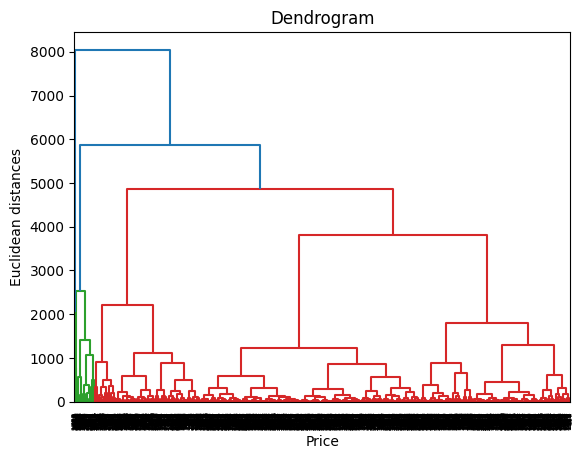

In [7]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Price')
plt.ylabel('Euclidean distances')
plt.show()

In [8]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


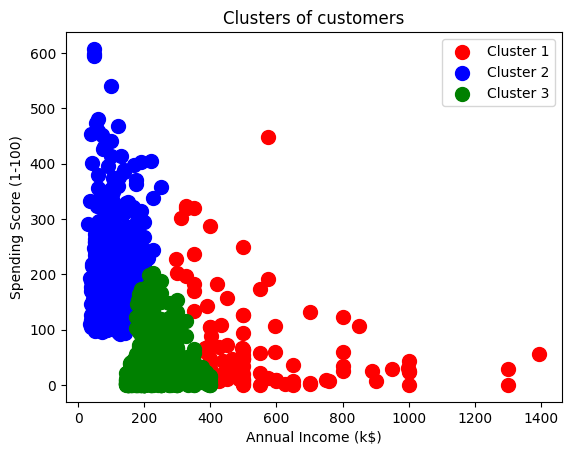

In [11]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()